## The Data: Diabetes 130-US hospitals for years 1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

# Loading Data

Set pandas options:
+ Display max columns: 500
+ inf values are considered na

In [320]:
import pandas as pd
import numpy as np

# display options
pd.set_option('display.max_columns', 500)
pd.options.mode.use_inf_as_na = True
df = pd.read_csv('diabetic_data.csv')
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data investigation

Plotting the target column readmmitted to see the frequency of each class


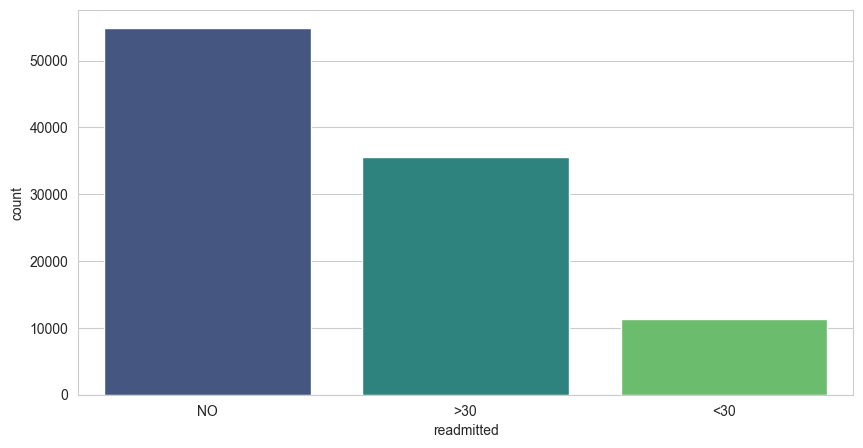

In [321]:
# plot bar chart of the target variable (color-coded by class)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='readmitted',data=df, palette='viridis',hue='readmitted',legend=False)
plt.show()

We can see the class imbalance happens here, so in order to fix that, we decide to combine the ">30" and "<30" into one class "YES". The problem would become classification between NO and YES for readmitted

In [322]:
# replace class > 30 and < 30 with Yes
df['readmitted'].replace(['>30','<30'], 'YES', inplace=True)
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


We take a look at summary of this data, all of its feature

In [323]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum() + df.isin(['?']).sum() + df.isin(['Unknown/Invalid','None','Not Mapped','Not Available'," ","",'NULL']).sum()
    summary_df['missing%'] = (df.isna().sum() + df.isin(['?']).sum() + df.isin(['Unknown/Invalid','None','Not Mapped','Not Available'," ","",'NULL']).sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df)


,dtypes,missing#,missing%,unique,count
encounter_id,int64,0,0.000000,101766,101766
patient_nbr,int64,0,0.000000,71518,101766
race,object,2273,0.022336,6,101766
gender,object,3,0.000029,3,101766
age,object,0,0.000000,10,101766
weight,object,98569,0.968585,10,101766
admission_type_id,int64,0,0.000000,8,101766
discharge_disposition_id,int64,0,0.000000,26,101766
admission_source_id,int64,0,0.000000,17,101766
time_in_hospital,int64,0,0.000000,14,101766


+ It can be observed that there are some features having lots of missing / nan / "?" values
+ Many of them have high missing rate (>30%) (around 40,000 samples)
==> We decide to omit those features

But first, let's see specifically what those features are:

In [324]:
col_to_drop = summary(df)[summary(df)['missing%'] > 0.3].index.to_list()
col_to_drop.append('encounter_id')
col_to_drop.append('patient_nbr')
col_to_drop

['weight',
 'payer_code',
 'medical_specialty',
 'max_glu_serum',
 'A1Cresult',
 'encounter_id',
 'patient_nbr']

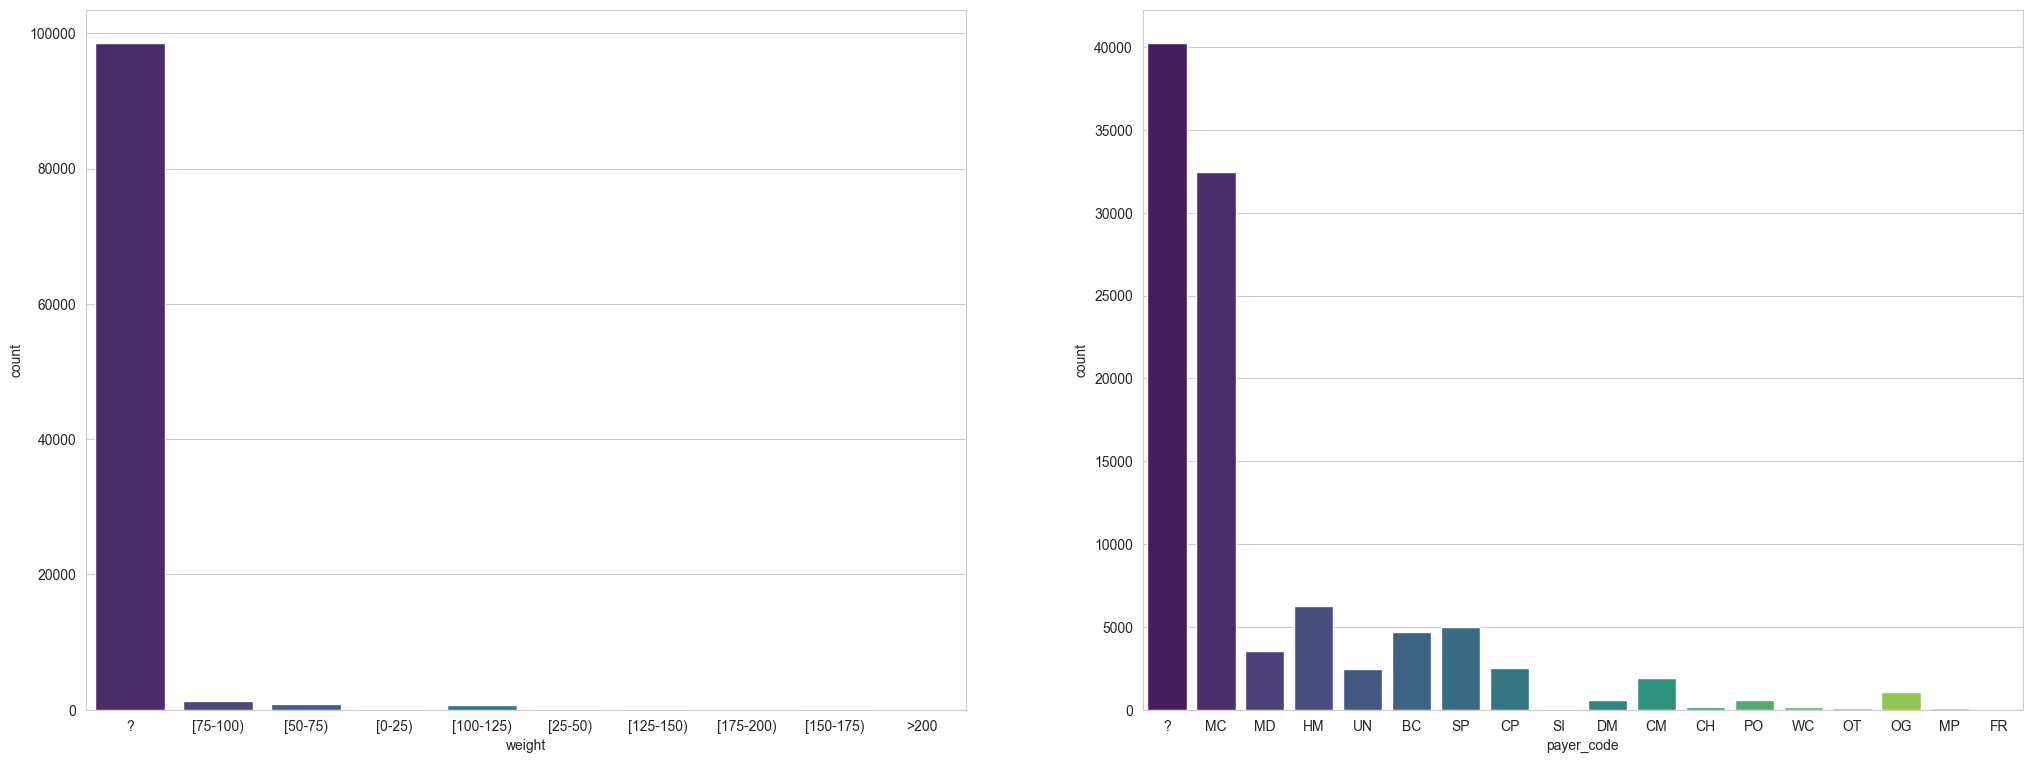

In [325]:
#sub plots showing values frequency for "weight" and "payer_code" features with missing values > 0.3%
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(25, 20))
plt.subplot(2,2,1)
sns.countplot(x='weight',data=df, palette='viridis',hue='weight',legend=False)
plt.subplot(2,2,2)
sns.countplot(x='payer_code',data=df, palette='viridis',hue='payer_code',legend=False)
plt.show()

Plot show frequency of "?" vs real values for each feature

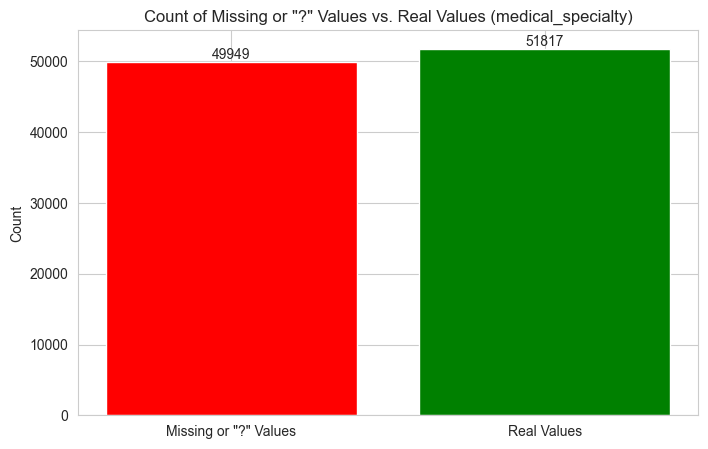

In [326]:
def plot_missing_values(df,col_name):
    missing_values = df.isna().sum() + df.isin(['?']).sum()
    real_values = len(df) - missing_values

    plt.figure(figsize=(8, 5))
    bars = plt.bar(['Missing or "?" Values', 'Real Values'], [missing_values.sum(), real_values.sum()], color=['red', 'green'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

    plt.title('Count of Missing or "?" Values vs. Real Values ' + '('+col_name+')')
    plt.ylabel('Count')
    plt.show()

plot_missing_values(df['medical_specialty'],'medical_specialty')

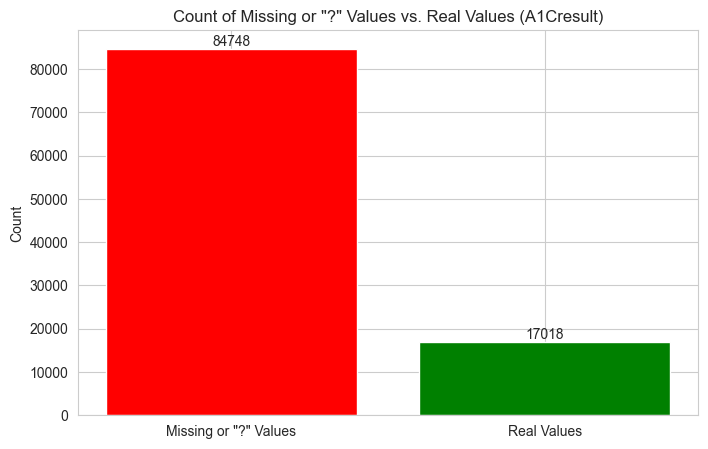

In [327]:
plot_missing_values(df['A1Cresult'],'A1Cresult')

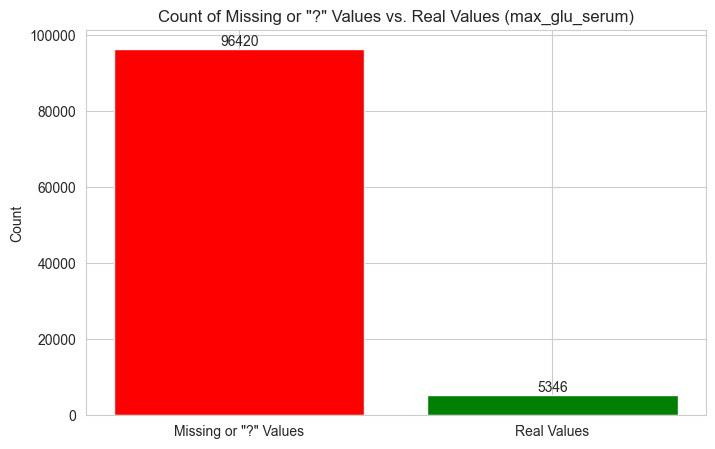

In [328]:
plot_missing_values(df['max_glu_serum'],'max_glu_serum')

Drop 'weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult' features

In [329]:
df_new = df.drop(col_to_drop, axis=1)
df_new.head()
summary(df_new)

,dtypes,missing#,missing%,unique,count
race,object,2273,0.022336,6,101766
gender,object,3,0.000029,3,101766
age,object,0,0.000000,10,101766
admission_type_id,int64,0,0.000000,8,101766
discharge_disposition_id,int64,0,0.000000,26,101766
admission_source_id,int64,0,0.000000,17,101766
time_in_hospital,int64,0,0.000000,14,101766
num_lab_procedures,int64,0,0.000000,118,101766
num_procedures,int64,0,0.000000,7,101766
num_medications,int64,0,0.000000,75,101766


# Imputation

There are still features with missing values; However, the amount is not so large, so we decide to use Imputation to solve the problem

+ We did some references about imputation and here are the source: 
    + https://www.youtube.com/watch?v=m_qKhnaYZlc
    + https://www.youtube.com/watch?v=-uC79UTOye8

In [330]:
col_to_impute = summary(df_new)[summary(df_new)['missing#'] > 0].index.to_list()
col_to_impute

['race', 'gender', 'diag_1', 'diag_2', 'diag_3']

First, we need to statistically understand data of these features for better imputation strategy decision
+ We'll look at their dtypes
+ Reasons why they are missing ==> classifying missing values


In [331]:
df_new[col_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   race    101766 non-null  object
 1   gender  101766 non-null  object
 2   diag_1  101766 non-null  object
 3   diag_2  101766 non-null  object
 4   diag_3  101766 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


Missing values in race must be NMAR, Not Missing At Random, because very old people tend to have missing values of their race

Following is the dataset that contains only records with null or "?" race values

In [332]:
race_null = df_new[df_new['race'].isna() | df_new['race'].isin(['?','Unknown/Invalid','None','Not Mapped','Not Available'," "])]
race_null.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
19,?,Male,[70-80),3,6,2,6,42,2,23,0,0,0,737,427,714,8,No,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
20,?,Female,[50-60),2,1,4,2,66,1,19,0,0,0,410,427,428,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
21,?,Male,[60-70),2,1,4,2,36,2,11,0,0,0,572,456,427,6,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
54,?,Female,[60-70),3,1,2,4,54,4,4,0,0,0,618,997,618,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
65,?,Female,[90-100),2,3,2,8,43,3,18,0,0,0,250.7,440,715,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,YES


<Axes: title={'center': 'Frequency of Age in whole dataset'}, xlabel='age', ylabel='count'>

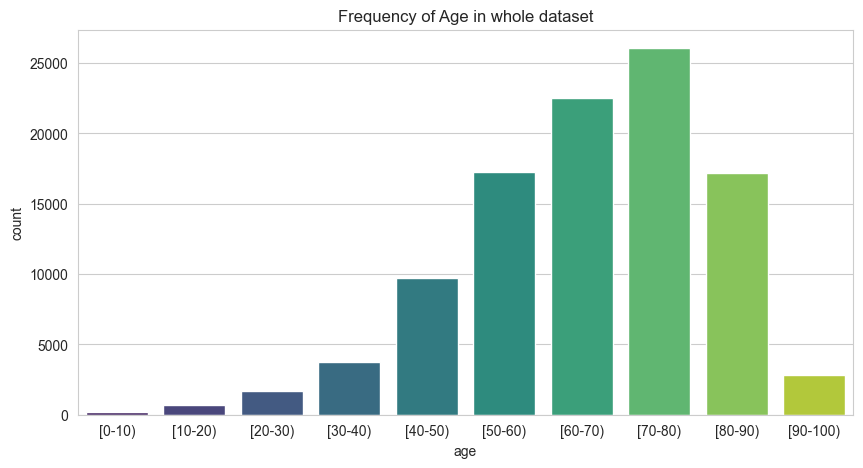

In [333]:
#plot frequency for each age
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.title('Frequency of Age in whole dataset')
sns.countplot(x='age',data=df_new, palette='viridis',hue='age',legend=False)


Text(0.5, 1.0, 'Age countplot of data set with null race values')

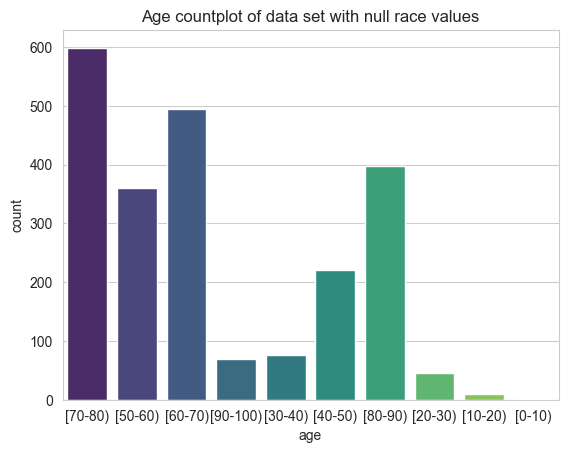

In [334]:
sns.countplot(x='age',data=race_null, palette='viridis',hue='age',legend=False)
plt.title('Age countplot of data set with null race values')

In [335]:
# Imputation for race column
# We use model-based imputation for only "race"

from sklearn.linear_model import LogisticRegression
import numpy as np
# Encode age column
from sklearn.preprocessing import LabelEncoder

# Encode age column for dataset where all values for race is null or "?" or "Unknown/Invalid","None","Not Mapped","Not Available"," "
# We will use this dataset to predict
le = LabelEncoder()
race_null['age'] = le.fit_transform(race_null['age'])

le1 = LabelEncoder()
le2 = LabelEncoder()
# This dataset will be used to train the model as they are those records without null 
# or "?" or "Unknown/Invalid","None","Not Mapped","Not Available",(" ") """

df_without_null = df_new.drop(race_null.index, axis=0)
x_age = le1.fit_transform(df_without_null['age'])
y_race = le2.fit_transform(df_without_null['race'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1492\3879640522.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_null['age'] = le.fit_transform(race_null['age'])


In [336]:
# Train the model
model = LogisticRegression()
model.fit(X=np.array(x_age).reshape(-1,1),y=np.array(y_race).reshape(-1,1).ravel())
pred = model.predict(X=np.array(race_null['age']).reshape(-1,1))

print(pred)
print(len(pred))


[2 2 2 ... 2 2 2]
2273


In [337]:
#transform back to original values.
pred = le2.inverse_transform(pred)
print(pred)
print(np.unique(pred))

['Caucasian' 'Caucasian' 'Caucasian' ... 'Caucasian' 'Caucasian'
 'Caucasian']
['AfricanAmerican' 'Caucasian']


In [338]:
df_without_null['age'] = le1.inverse_transform(x_age)
df_without_null['race'] = le2.inverse_transform(y_race)

In [339]:
#replace null values with predicted values
race_null['race'] = pred
df_tmp = pd.concat([race_null,df_without_null])
df_tmp['race']
df_new = df_tmp.sort_index()
df_new.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1492\1518483339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_null['race'] = pred


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [340]:
summary(df_new)

,dtypes,missing#,missing%,unique,count
race,object,0,0.000000,5,101766
gender,object,3,0.000029,3,101766
age,object,0,0.000000,20,101766
admission_type_id,int64,0,0.000000,8,101766
discharge_disposition_id,int64,0,0.000000,26,101766
admission_source_id,int64,0,0.000000,17,101766
time_in_hospital,int64,0,0.000000,14,101766
num_lab_procedures,int64,0,0.000000,118,101766
num_procedures,int64,0,0.000000,7,101766
num_medications,int64,0,0.000000,75,101766


In [341]:
# Save columns of numerical features
num_cols = df_new.select_dtypes(include=np.number).columns.to_list()
cate_cols = df_new.select_dtypes(exclude=np.number).columns.to_list()


+ In this part, as some Imputer can not be used with categorical values. We first decide to label encoder those col_to_impute features.
+ However, we'll save the mapping between transformed and original values for later imputation steps.
    + SimpleImputer for "diag_1" , "diag_2" , "diag_3" and "gender", because we can not specify how these columns have missing values, so they must be MCAR: Missing Completely At Random

In [342]:
# encode race column
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
df_new['diag_1'] = le1.fit_transform(df_new['diag_1'])
df_new['diag_2'] = le2.fit_transform(df_new['diag_2'])
df_new['diag_3'] = le3.fit_transform(df_new['diag_3'])
df_new['gender'] = le4.fit_transform(df_new['gender'])

Mapping for diag_1 before and after transformed

In [343]:
def mapping_before_after(dict,keys_to_print):
    for key in keys_to_print:
        if key in dict.keys():
            print(f'Value before mapping: {key} and value after mapping: {dict[key]}')
    

In [344]:
diag1_dict = dict(zip(le1.classes_, le1.transform(le1.classes_)))
keys_to_print = ['?','Unknown/Invalid','None','Not Mapped','Not Available'," ",np.nan]

# Print values for the specified keys
mapping_before_after(diag1_dict,keys_to_print)

Value before mapping: ? and value after mapping: 697


Mapping for diag_2 before and after transformed

In [345]:
diag2_dict = dict(zip(le2.classes_, le2.transform(le2.classes_)))
# Print values for the specified keys
mapping_before_after(diag2_dict,keys_to_print)

Value before mapping: ? and value after mapping: 650


Mapping for diag_3 before and after transformed

In [346]:
diag3_dict = dict(zip(le3.classes_, le3.transform(le3.classes_)))
# Print values for the specified keys
mapping_before_after(diag3_dict,keys_to_print)

Value before mapping: ? and value after mapping: 670


Mapping for "gender" before and after transformed

In [347]:
gender_dict = dict(zip(le4.classes_, le4.transform(le4.classes_)))
# Print values for the specified keys
mapping_before_after(gender_dict,keys_to_print)

Value before mapping: Unknown/Invalid and value after mapping: 2


+ Next, those 0 values, which stands for "?" or missing values, will be replaced with np.nan values; those values can be imputed using SimpleImputer.
+ And the next is just to impute those values using model based Imputation

In [348]:
# Impute for diag_1, diag_2, diag_3
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df_new['diag_1'] = imputer.fit_transform(df_new[['diag_1']])
df_new['diag_2'] = imputer.fit_transform(df_new[['diag_2']])
df_new['diag_3'] = imputer.fit_transform(df_new[['diag_3']])

summary(df_new[col_to_impute])

,dtypes,missing#,missing%,unique,count
race,object,0,0.0,5,101766
gender,int32,0,0.0,3,101766
diag_1,int32,0,0.0,717,101766
diag_2,int32,0,0.0,749,101766
diag_3,int32,0,0.0,790,101766


==> All columns with missing data have been imputed

# Encode Categorical features

Label encode for other columns of Object dtype

In [349]:
# Target encoding for Object columns
obj_col = df_new.select_dtypes(include='object').columns.to_list()

# Turn values in those columns to string type for label encoder to work properly
df_new[obj_col] = df_new[obj_col].astype(str)
for col in obj_col:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])


In [350]:
# from sklearn.model_selection import StratifiedKFold
# from category_encoders import TargetEncoder

# # Target encoding for Object columns
# k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# encoder = TargetEncoder(cols=obj_col, handle_unknown='value', return_df=True, drop_invariant=False, min_samples_leaf=1, smoothing=1.0)
    

In [351]:
df_new.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,10,6,25,1,1,41,0,1,0,0,0,124,650,670,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0
1,2,0,11,1,1,7,3,59,0,18,0,0,0,143,79,121,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
2,0,0,12,1,1,7,2,11,5,13,2,0,1,454,78,767,6,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0
3,2,1,13,1,1,7,2,44,1,16,0,0,0,554,97,248,7,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,0
4,2,1,14,1,1,7,1,51,0,8,0,0,0,54,24,86,5,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,0
5,2,1,15,2,1,2,3,31,6,16,0,0,0,263,246,86,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,1
6,2,1,16,3,1,2,4,70,1,21,0,0,0,263,246,771,7,2,1,1,1,2,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,0
7,2,1,17,1,1,7,5,73,0,12,0,0,0,276,314,86,8,1,1,1,1,1,0,1,2,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1
8,2,0,18,2,1,4,13,68,2,28,0,0,0,252,260,229,8,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,0
9,2,0,19,3,3,4,12,33,3,18,0,0,0,282,46,317,8,1,1,1,1,1,0,1,1,0,1,2,1,1,0,0,0,0,2,1,0,0,0,0,0,1,0


# Removing duplicates


In [352]:
# Removing duplicate records
print("Before drop duplicate: ",len(df_new))
df_new.drop_duplicates(inplace=True)
print("After drop duplicate: ",len(df_new))


Before drop duplicate:  101766
After drop duplicate:  101766


# Train the model

Train Test Split

In [353]:
from sklearn.model_selection import train_test_split

X = df_new.drop('readmitted',axis=1)
y = df_new['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using KNN Classifier - Without Feature selection

In [354]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=300,weights='distance', leaf_size=50, metric='euclidean',algorithm='brute',p=2)
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)


Accuracy score:  0.6044020831286233
Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.79      0.68     10952
           1       0.61      0.39      0.47      9402

    accuracy                           0.60     20354
   macro avg       0.61      0.59      0.58     20354
weighted avg       0.61      0.60      0.59     20354



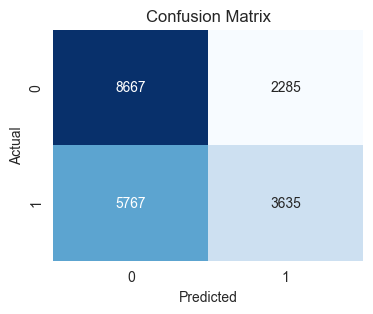

In [355]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Classification report: \n",classification_report(y_test,y_pred))

y_pred = knn.predict(X_test_scaled)
# plot confusion matrix
# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




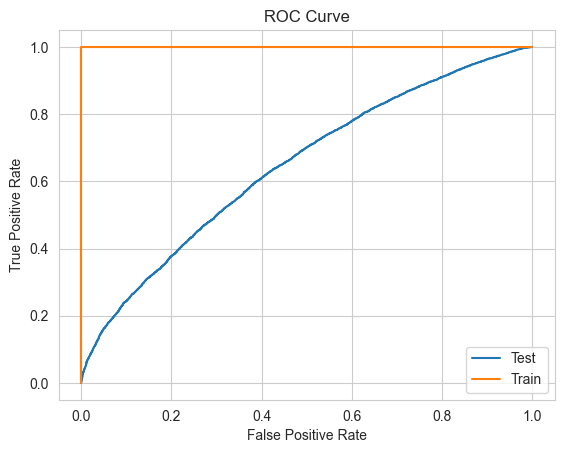

In [356]:
# plot ROC curve
# Calculate the probability scores of each point in the training set
y_train_score = knn.predict_proba(X_train_scaled)[:, 1]
# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
# Calculate the probability scores of each point in the test set
y_test_score = knn.predict_proba(X_test_scaled)[:, 1]
# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)
# ROC curve for test set
plt.plot(test_fpr, test_tpr, label='Test')
# ROC curve for train set
plt.plot(train_fpr, train_tpr, label='Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Doing Feature Selection

Using variance or correlation of variance (comparing variance relative to mean) to eliminate those features that have CV < 2

In [357]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif,VarianceThreshold

# feature selection
num_col_drop = []

#find variance for those features
var = df_new[num_cols].var(axis=0)

# find the mean of those features
mean = df_new[num_cols].mean(axis=0)

# find the coefficient of variation
variation = (var/mean)
for i in range(len(var)):
    print(f'Feature {num_cols[i]}: \n mean = {mean[i]} ; variance {var[i]} ; coefficient of variation {variation[i]}')
    if variation[i] < 2:
        num_col_drop.append(num_cols[i])


Feature admission_type_id: 
 mean = 2.024006053102215 ; variance 2.0891893402670005 ; coefficient of variation 1.0322050850909652
Feature discharge_disposition_id: 
 mean = 3.7156417664052825 ; variance 27.88014780559363 ; coefficient of variation 7.503454196707027
Feature admission_source_id: 
 mean = 5.754436648782501 ; variance 16.516753027593712 ; coefficient of variation 2.87026411718135
Feature time_in_hospital: 
 mean = 4.395986871843248 ; variance 8.910868383417293 ; coefficient of variation 2.0270461771604302
Feature num_lab_procedures: 
 mean = 43.09564098028811 ; variance 387.0805299104688 ; coefficient of variation 8.981895177925741
Feature num_procedures: 
 mean = 1.339730361810428 ; variance 2.909777450018454 ; coefficient of variation 2.1719127467458175
Feature num_medications: 
 mean = 16.021844230882614 ; variance 66.05733248439786 ; coefficient of variation 4.122954357343598
Feature number_outpatient: 
 mean = 0.36935715268360747 ; variance 1.6059608248899775 ; coeffi

In [358]:
print('Numeric features to drop: ',num_col_drop)
for col in num_col_drop:
    num_cols.remove(col)
print('Numeric features that will be used: ',num_cols)

Numeric features to drop:  ['admission_type_id', 'number_diagnoses']
Numeric features that will be used:  ['discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']


# Handling Outliers

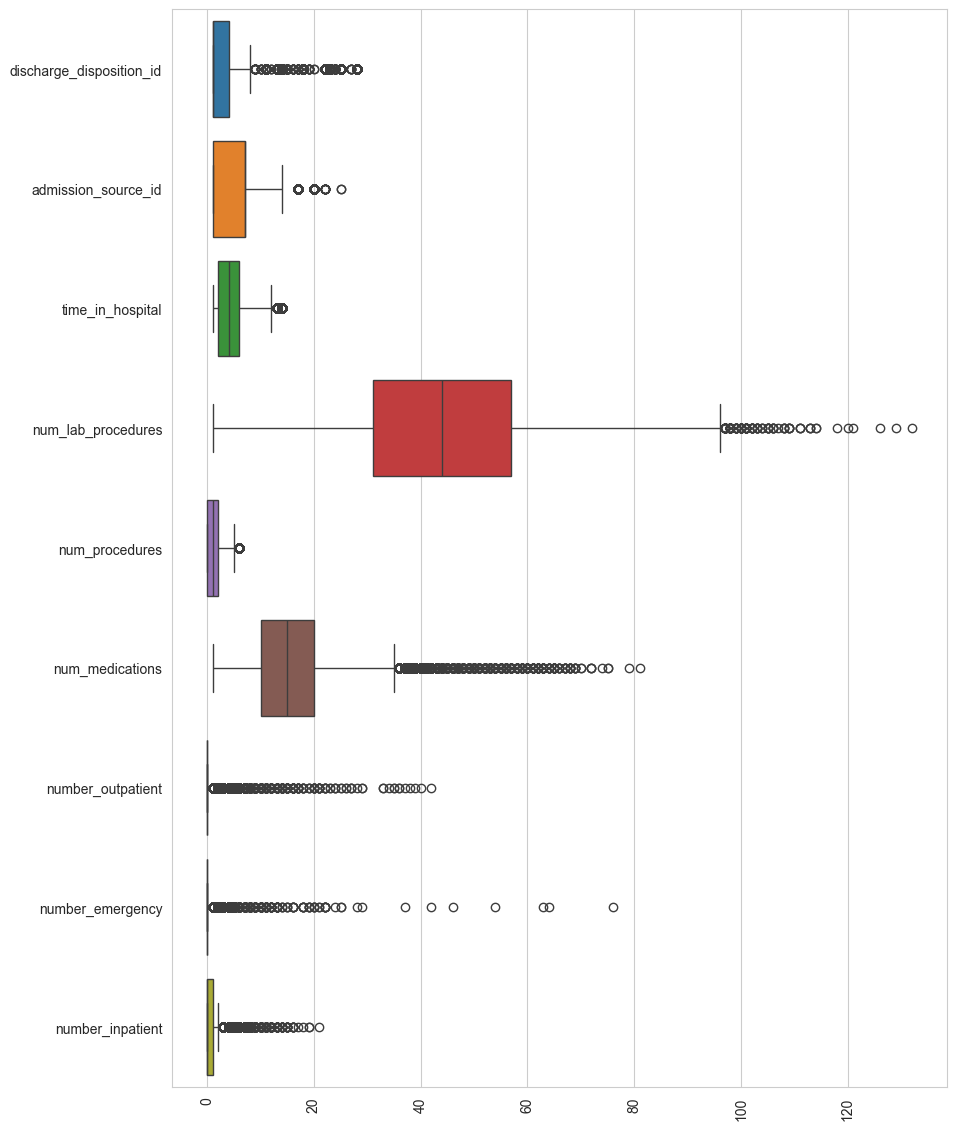

In [377]:
# plot boxplot for numeric features
plt.figure(figsize=(10, 14))
# make the plot horizontal
sns.boxplot(data=df_new[num_cols],vert=False,orient='h')
plt.xticks(rotation=90)
plt.show()



We decide to apply trimming (delete outliers) for those features whose number of outliers are not so remarkable

In [424]:
# Data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

# Calculate Q1, Q3 and IQR
q1 = df_new[num_cols].quantile(0.25)
q3 = df_new[num_cols].quantile(0.75)
iqr = q3 - q1

# count the number of outliers for each numeric feature
outliers =  (df_new[num_cols] > (q3 + 1.5 * iqr)) |(df_new[num_cols] < (q1 - 1.5 * iqr))
print(outliers.sum(),'\n')
print(outliers.sum()/len(df_new))




# Different ways to count outliers
# out = []
# for i in range(len(num_cols)):
#     out.append(len(df_new[(df_new[num_cols[i]] > (q3[i] + 1.5 * iqr[i])) | (df_new[num_cols[i]] < (q1[i] - 1.5 * iqr[i]))]))



discharge_disposition_id     9818
admission_source_id          6956
time_in_hospital             2252
num_lab_procedures            143
num_procedures               4954
num_medications              2557
number_outpatient           16739
number_emergency            11383
number_inpatient             7049
dtype: int64 

discharge_disposition_id    0.096476
admission_source_id         0.068353
time_in_hospital            0.022129
num_lab_procedures          0.001405
num_procedures              0.048680
num_medications             0.025126
number_outpatient           0.164485
number_emergency            0.111855
number_inpatient            0.069267
dtype: float64
